In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
!ls /projects01/didsr-aiml/brandon.nelson/XCAT_body

female_1yr_ref_atn_1.bin.filepart  Peds_w_liver_lesions_08-10-2023_12-41
full_fov			   test_torsos_0
Peds_w_liver_lesions		   test_torsos_1


In [3]:
dirP = Path('/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations')

In [5]:
summary = pd.concat([pd.read_csv(f) for f in dirP.glob('*.csv')]).reset_index()

summary

index  Unnamed: 0                 Code #  age (month)  age (year) gender  \
0        0           4  Reference 15 yr old F          180        15.0      F   
1        0           8                    329           33         2.8      M   
2        0          12                     77          372        31.0      M   
3        0          15                    148          624        52.0      M   
4        0           6                    290           25         2.1      F   
..     ...         ...                    ...          ...         ...    ...   
173      0          11                    321           67         5.6      M   
174      0          12                     77          372        31.0      M   
175      0          19                    152          384        32.0      F   
176      0          13                     93          528        44.0      M   
177      0          13                     93          528        44.0      M   

     weight (kg)  height (cm)       BMI  weight percentile  height percentile  \
0           53.0        161.0  20.80000               52.0                NaN   
1           14.1         92.0  16.66000               53.0               78.3   
2           77.9        185.2  22.71000               49.1               13.0   
3          108.0        183.2  32.18000               92.5               74.0   
4           12.2         86.8  16.90000               47.0               28.1   
..           ...          ...       ...                ...                ...   
173         21.8        116.7  16.01000               75.0               75.1   
174         77.9        185.2  22.71000               49.1               13.0   
175         80.3        171.5  27.30155               77.6               90.5   
176         92.6        181.0  28.27000               71.3               51.0   
177         92.6        181.0  28.27000               71.3               51.0   

                     Notes ethnicity  kVp   mA  slice  simulation id  \
0                      NaN       NaN  130  100    207              0   
1                      NaN       NaN   90  500    385              0   
2                      NaN     asian  100  400    491              0   
3                      NaN     white  140   50    455              0   
4    Can be male or female       NaN  130  100      8              0   
..                     ...       ...  ...  ...    ...            ...   
173  Can be male or female       NaN   90  400    134              0   
174                    NaN     asian  140  450     69              0   
175                    NaN     white   80   50    478              0   
176                    NaN     black  130  300    405              0   
177                    NaN     black  130  200    317              0   

     add lesion lesion name                                       results name  
0         False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
1         False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
2         False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
3         False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
4         False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
..          ...         ...                                                ...  
173       False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
174       False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
175       False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
176       False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  
177       False         NaN  /projects01/didsr-aiml/brandon.nelson/XCAT_bod...  

[178 rows x 20 columns]

## TODOS

1. Will probably need to do an initial QC commissioning of these simulations with our Digital Image Quality phantoms to make sure that mA, kVp and other trends are as expected
2. when lesions are available, find way to map or overlay their ground truth locations to that in the reconed image

In [6]:
summary['results name']

0      /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
1      /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
2      /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
3      /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
4      /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
                             ...                        
173    /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
174    /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
175    /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
176    /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
177    /projects01/didsr-aiml/brandon.nelson/XCAT_bod...
Name: results name, Length: 178, dtype: object

In [7]:
def load_volume(path, shape=(512, 512, 1), dtype='float32'):
    input_image = np.fromfile(path, dtype=dtype)
    input_image = input_image.reshape(shape)
    return(input_image)

In [8]:
load_volume(summary['results name'].iloc[0]).shape

(512, 512, 1)

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/female_15yr_ref/female_15yr_ref_207_100mA_130kV_512x512x1.raw


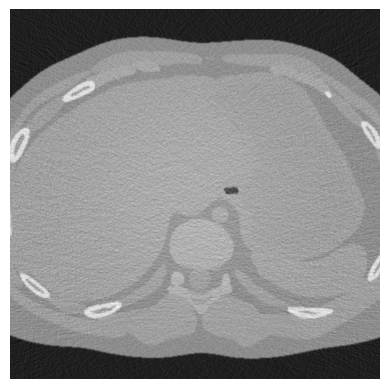

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_pt329/male_pt329_385_500mA_90kV_512x512x1.raw


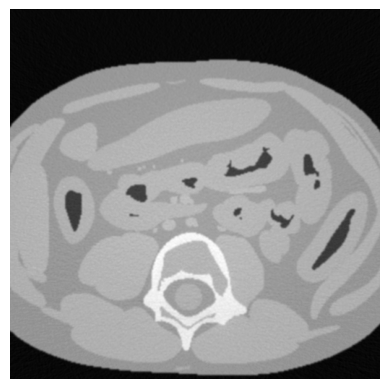

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_pt77/male_pt77_491_400mA_100kV_512x512x1.raw


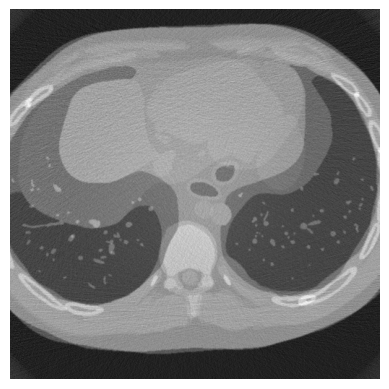

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_pt148/male_pt148_455_50mA_140kV_512x512x1.raw


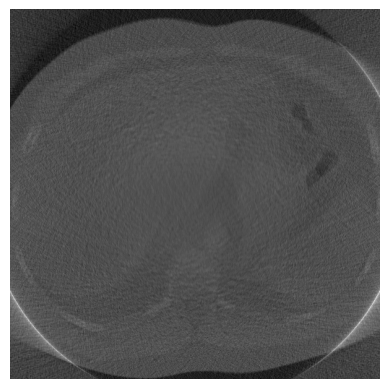

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/female_pt290/female_pt290_8_100mA_130kV_512x512x1.raw


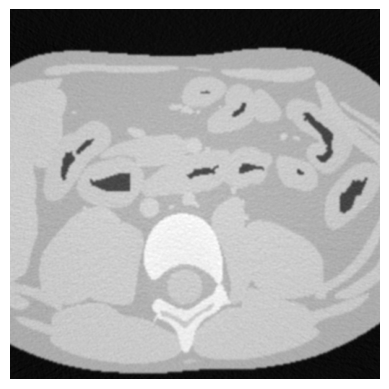

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_pt77/male_pt77_231_450mA_120kV_512x512x1.raw


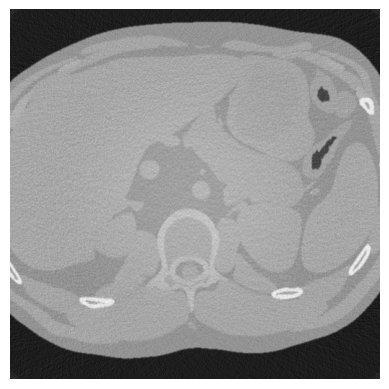

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_pt324/male_pt324_389_50mA_120kV_512x512x1.raw


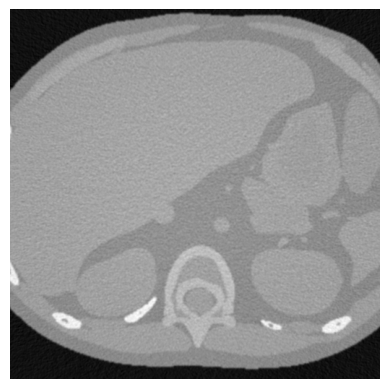

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_5yr_ref/male_5yr_ref_480_300mA_90kV_512x512x1.raw


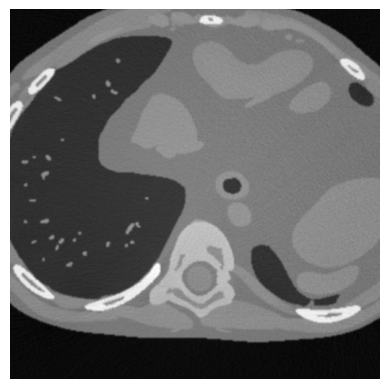

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/female_pt328/female_pt328_81_150mA_130kV_512x512x1.raw


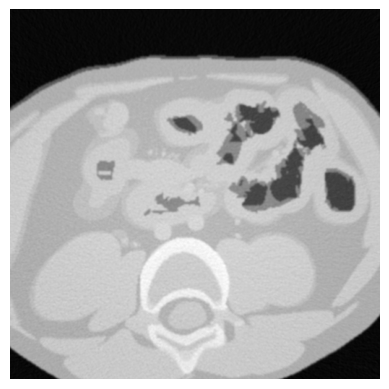

/projects01/didsr-aiml/brandon.nelson/XCAT_body/Peds_w_liver_lesions_08-10-2023_12-41/simulations/simulations/male_15yr_ref/male_15yr_ref_262_200mA_110kV_512x512x1.raw


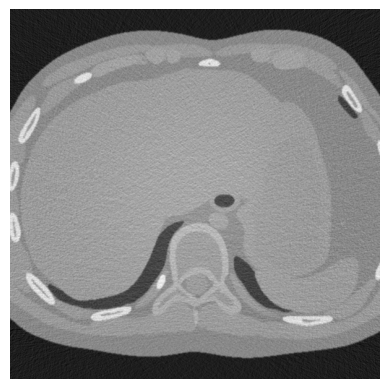

In [9]:
for i in range(10):
    im_name = summary['results name'].iloc[i]
    print(im_name)
    image = load_volume(im_name)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

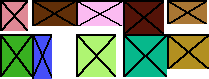

In [9]:
import numpy as np
from PIL import Image

def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid

def dummy(w, h):
    "Produces a dummy PIL image of given dimensions"
    from PIL import ImageDraw
    im = Image.new('RGB', (w, h), color=tuple((np.random.rand(3) * 255).astype(np.uint8)))
    draw = ImageDraw.Draw(im)
    points = [(i, j) for i in (0, im.size[0]) for j in (0, im.size[1])]
    for i in range(len(points) - 1):
        for j in range(i+1, len(points)):
            draw.line(points[i] + points[j], fill='black', width=2)
    return im

dummy_images = [dummy(20 + np.random.randint(30), 20 + np.random.randint(30)) for _ in range(10)]
pil_grid(dummy_images, 5)

In [10]:
def normalize(image): return 1 - (image.max() - image) / (image.max() - image.min())

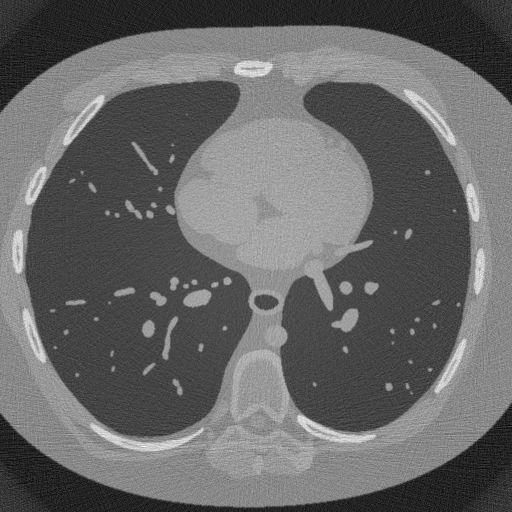

In [11]:
Image.fromarray((normalize(image[:,:,0])*255).astype('uint8'))

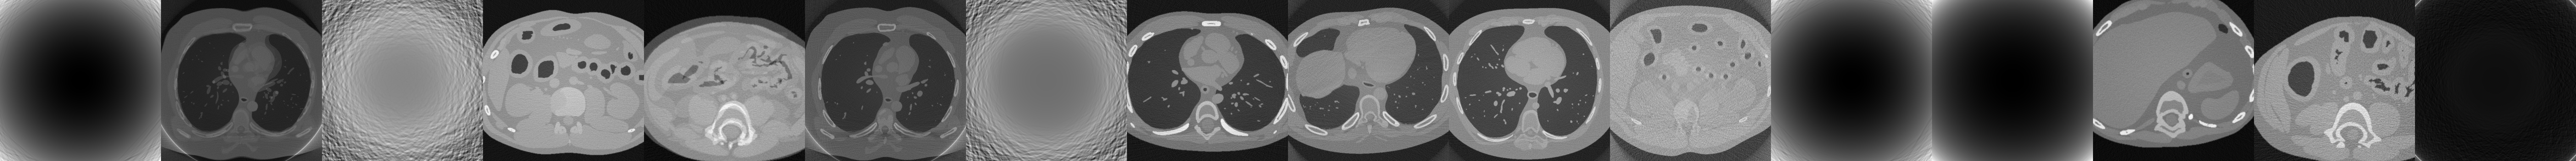

In [12]:
l_images = []
N = min(len(summary), 20)
for i in range(N):
    im_name = summary['results name'].iloc[i]
    image = (normalize(load_volume(im_name)[:,:,0])*255).astype('uint8')
    l_images.append(Image.fromarray(image))
pil_grid(l_images)